In [2]:
import numpy as np
import torch
import math
import torch.nn.functional as F
import torch.nn as nn
from env import Game
from train import TrainAgent, get_model
from pg_model import Encoder, PolicyNet, ValueNet, OriginalPolicyNet
from torch import optim
import os
%load_ext autoreload
%autoreload 2

dev = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

old_policy_path = r"D:\Workspace\machine learning\git repos\2048_PolicyGradient\ckpt\old_policy.pt"
old_policy, _ = get_model(OriginalPolicyNet, path=old_policy_path)

encoder1, _ = get_model(Encoder)
encoder2, _ = get_model(Encoder)
policy, _ = get_model(PolicyNet(encoder1))
value, _ = get_model(ValueNet(encoder2))

para_list = list(policy.parameters()) + list(value.parameters())
opt = optim.Adam(para_list)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
agent = TrainAgent(policy, value, opt, old_policy)
agent.train(epochs=2000, lamda=0.5, epsilon=0.3)

Complete with 7704 greedy trajectory starting states, 11986 expert trajectory starting states and 5000 random starting states
This is 24690 starting states in total
Start PPO


  0%|          | 1/2000 [00:26<14:28:33, 26.07s/it]

Average score: 457.3, # of starting states: 24692


  5%|▌         | 101/2000 [46:22<15:34:56, 29.54s/it]

Average score: 1306.6, # of starting states: 25207


 10%|█         | 201/2000 [1:36:41<18:10:09, 36.36s/it]

Average score: 2425.9, # of starting states: 26021


 15%|█▌        | 301/2000 [2:39:52<16:20:56, 34.64s/it]

Average score: 2054.0, # of starting states: 27080


 20%|██        | 401/2000 [4:03:15<33:16:19, 74.91s/it]

Average score: 4612.2, # of starting states: 28455


 25%|██▌       | 501/2000 [6:10:11<36:08:34, 86.80s/it]

Average score: 4684.7, # of starting states: 30216


 30%|███       | 601/2000 [8:26:05<35:06:10, 90.33s/it] 

Average score: 4601.2, # of starting states: 32123


 35%|███▌      | 701/2000 [10:45:01<43:27:59, 120.46s/it]

Average score: 4397.7, # of starting states: 34028


 37%|███▋      | 735/2000 [11:44:52<33:44:43, 96.03s/it] 

In [30]:
root_dir = r"D:\Workspace\machine learning\git repos\2048_PolicyGradient"
torch.save(policy.state_dict(), fr"{root_dir}\policy.pt")
torch.save(value.state_dict(), fr"{root_dir}\value.pt") 
torch.save(policy, fr"{root_dir}\policy_whole.pt")
torch.save(value, fr"{root_dir}\value_whole.pt") 

In [47]:
agent.evalute()

6214.266666666666

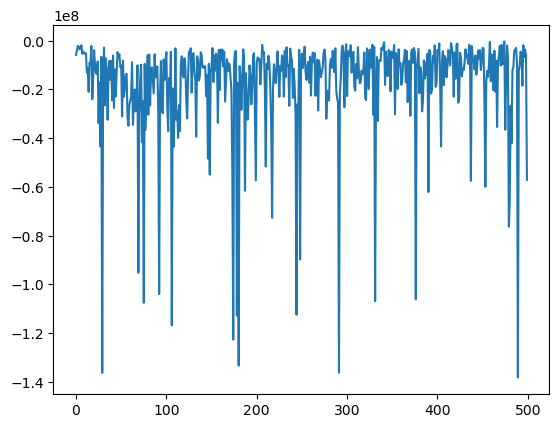

In [21]:
import matplotlib.pyplot as plt

plt.plot(losses)
plt.show()

In [41]:
from tqdm import tqdm
game = Game()
game.print()
dir = {0:"left", 1:"up", 2:"right", 3:"down"}
while not game.end_game:
    s = game.get_s().to(dev)[None, ...]
    p = policy(s).squeeze().detach()
    v = value(s).squeeze().detach()
    a = torch.multinomial(p, num_samples=1).item()
    r = game.step(a)
    print(p, v, dir[a])
    game.print()

Your current score: 0
Your current game board:
0	2	0	2	
0	0	0	0	
0	0	0	0	
0	0	0	0	
tensor([2.3438e-07, 8.4817e-15, 3.0597e-12, 1.0000e+00]) tensor(2873.3147) down
Your current score: 0
Your current game board:
0	0	0	0	
2	0	0	0	
0	0	0	0	
0	2	0	2	
tensor([1.5186e-16, 2.4029e-24, 1.6055e-20, 1.0000e+00]) tensor(3156.4670) down
Your current score: 0
Your current game board:
0	0	0	0	
0	0	0	0	
0	0	0	0	
2	2	2	2	
tensor([1.0000e+00, 1.4667e-24, 2.6127e-27, 4.3721e-19]) tensor(3555.6565) left
Your current score: 8
Your current game board:
0	0	2	0	
0	0	0	0	
0	0	0	0	
4	4	0	0	
tensor([9.9961e-01, 1.7840e-17, 4.4352e-15, 3.9239e-04]) tensor(3556.5237) left
Your current score: 16
Your current game board:
2	0	0	0	
2	0	0	0	
0	0	0	0	
8	0	0	0	
tensor([1.0893e-09, 2.3516e-14, 9.1302e-17, 1.0000e+00]) tensor(3001.5618) down
Your current score: 20
Your current game board:
2	0	0	0	
0	0	0	0	
4	0	0	0	
8	0	0	0	
tensor([1.3534e-03, 2.8093e-09, 1.0185e-11, 9.9865e-01]) tensor(3365.6853) down
Your current score: 

In [46]:
from tqdm import tqdm

tot = 0
for i in tqdm(range(250)):
    game = Game()
    while not game.end_game:
        # a = game.get_greedy_a()
        # a = np.random.randint(0, 4)
        s = game.get_s().to(dev)[None, ...]
        p = policy(s).squeeze()
        a = torch.multinomial(p, num_samples=1).item()
        r = game.step(a)
    tot += game.score
    if game.game_board.max() >= 2048:
        print("Win!!")
print(tot / 100)

100%|██████████| 250/250 [02:51<00:00,  1.46it/s]

16977.6
